In [137]:
import pandas as pd
import pmdarima as p
import matplotlib.pyplot as plt
import statsmodels.api as sm

import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [24]:
df = pd.read_csv('nyc_energy_consumption.csv')
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df = df.sort_values(by='timeStamp')

df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [14]:
fig = px.line(df, x='timeStamp', y='demand', title='Energy Consumption') 
fig.update_xaxes( rangeslider_visible=True, rangeselector=dict( buttons=list([ dict(step="all") ]) ) ) 
fig.show()

In [25]:
fig = px.line(df, x='timeStamp', y='temp', title='Temp') 
fig.update_xaxes( rangeslider_visible=True, rangeselector=dict( buttons=list([ dict(step="all") ]) ) ) 
fig.show()

In [27]:
el_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

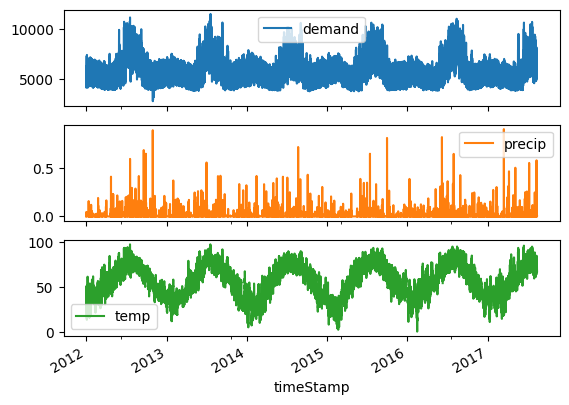

In [28]:
el_df.plot(subplots=True)

In [29]:
el_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49205 entries, 2012-01-01 00:00:00 to 2017-08-12 06:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  49124 non-null  float64
 1   precip  48975 non-null  float64
 2   temp    49019 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [31]:
el_df['demand']=el_df['demand'].fillna(method='ffill')
el_df['temp']=el_df['temp'].fillna(method='ffill')
el_df['precip']=el_df['precip'].fillna(method='ffill')

el_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49205 entries, 2012-01-01 00:00:00 to 2017-08-12 06:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  49205 non-null  float64
 1   precip  49205 non-null  float64
 2   temp    49205 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


C:\Users\OMAR\AppData\Local\Temp\ipykernel_8256\2343226554.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\OMAR\AppData\Local\Temp\ipykernel_8256\2343226554.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\OMAR\AppData\Local\Temp\ipykernel_8256\2343226554.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



C:\Users\OMAR\AppData\Local\Temp\ipykernel_8256\3602317614.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

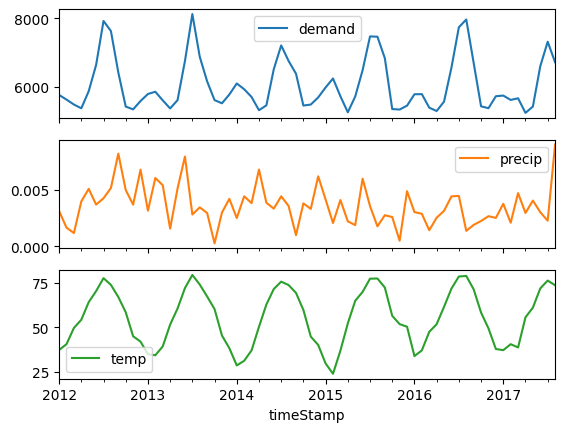

In [35]:
el_df.resample('M').mean().plot(subplots=True)


In [36]:
final_df=el_df.resample('M').mean()


C:\Users\OMAR\AppData\Local\Temp\ipykernel_8256\896620779.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [87]:
model = pm.auto_arima(final_df['demand'], m=12, seasonal=True, start_p=0, start_q=0, max_order=6,
                       test='adf',error_action='ignore', suppress_warnings=True, stepwise=True, trace=True)

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.384, Time=0.01 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.762, Time=0.78 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.769, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.560, Time=0.03 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1023.936, Time=1.68 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.97 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.95 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.780, Time=0.17 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.083, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.240, Time=0.10 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.899, Time=1.76 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1019.005, Time=1.84 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=1017.223, Time=2.43 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1008.231, Time=2.12 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=999.125, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1041.876, Time=0.13 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.68 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1011.756, Time=0.86 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.26 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1055.825, Time=0.28 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1011.888, Time=1.03 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1009.793, Time=1.15 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=1033.292, Time=0.53 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1004.676, Time=1.45 sec


C:\Users\OMAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,0)[12]             : AIC=1009.570, Time=0.67 sec

Best model:  ARIMA(1,0,1)(1,0,0)[12] intercept
Total fit time: 30.574 seconds


In [130]:
train=final_df[(final_df.index.get_level_values(0) >= '2012-01-31') & (final_df.index.get_level_values(0) <= '2016-12-31')]
test=final_df[(final_df.index.get_level_values(0) > '2016-12-31')]

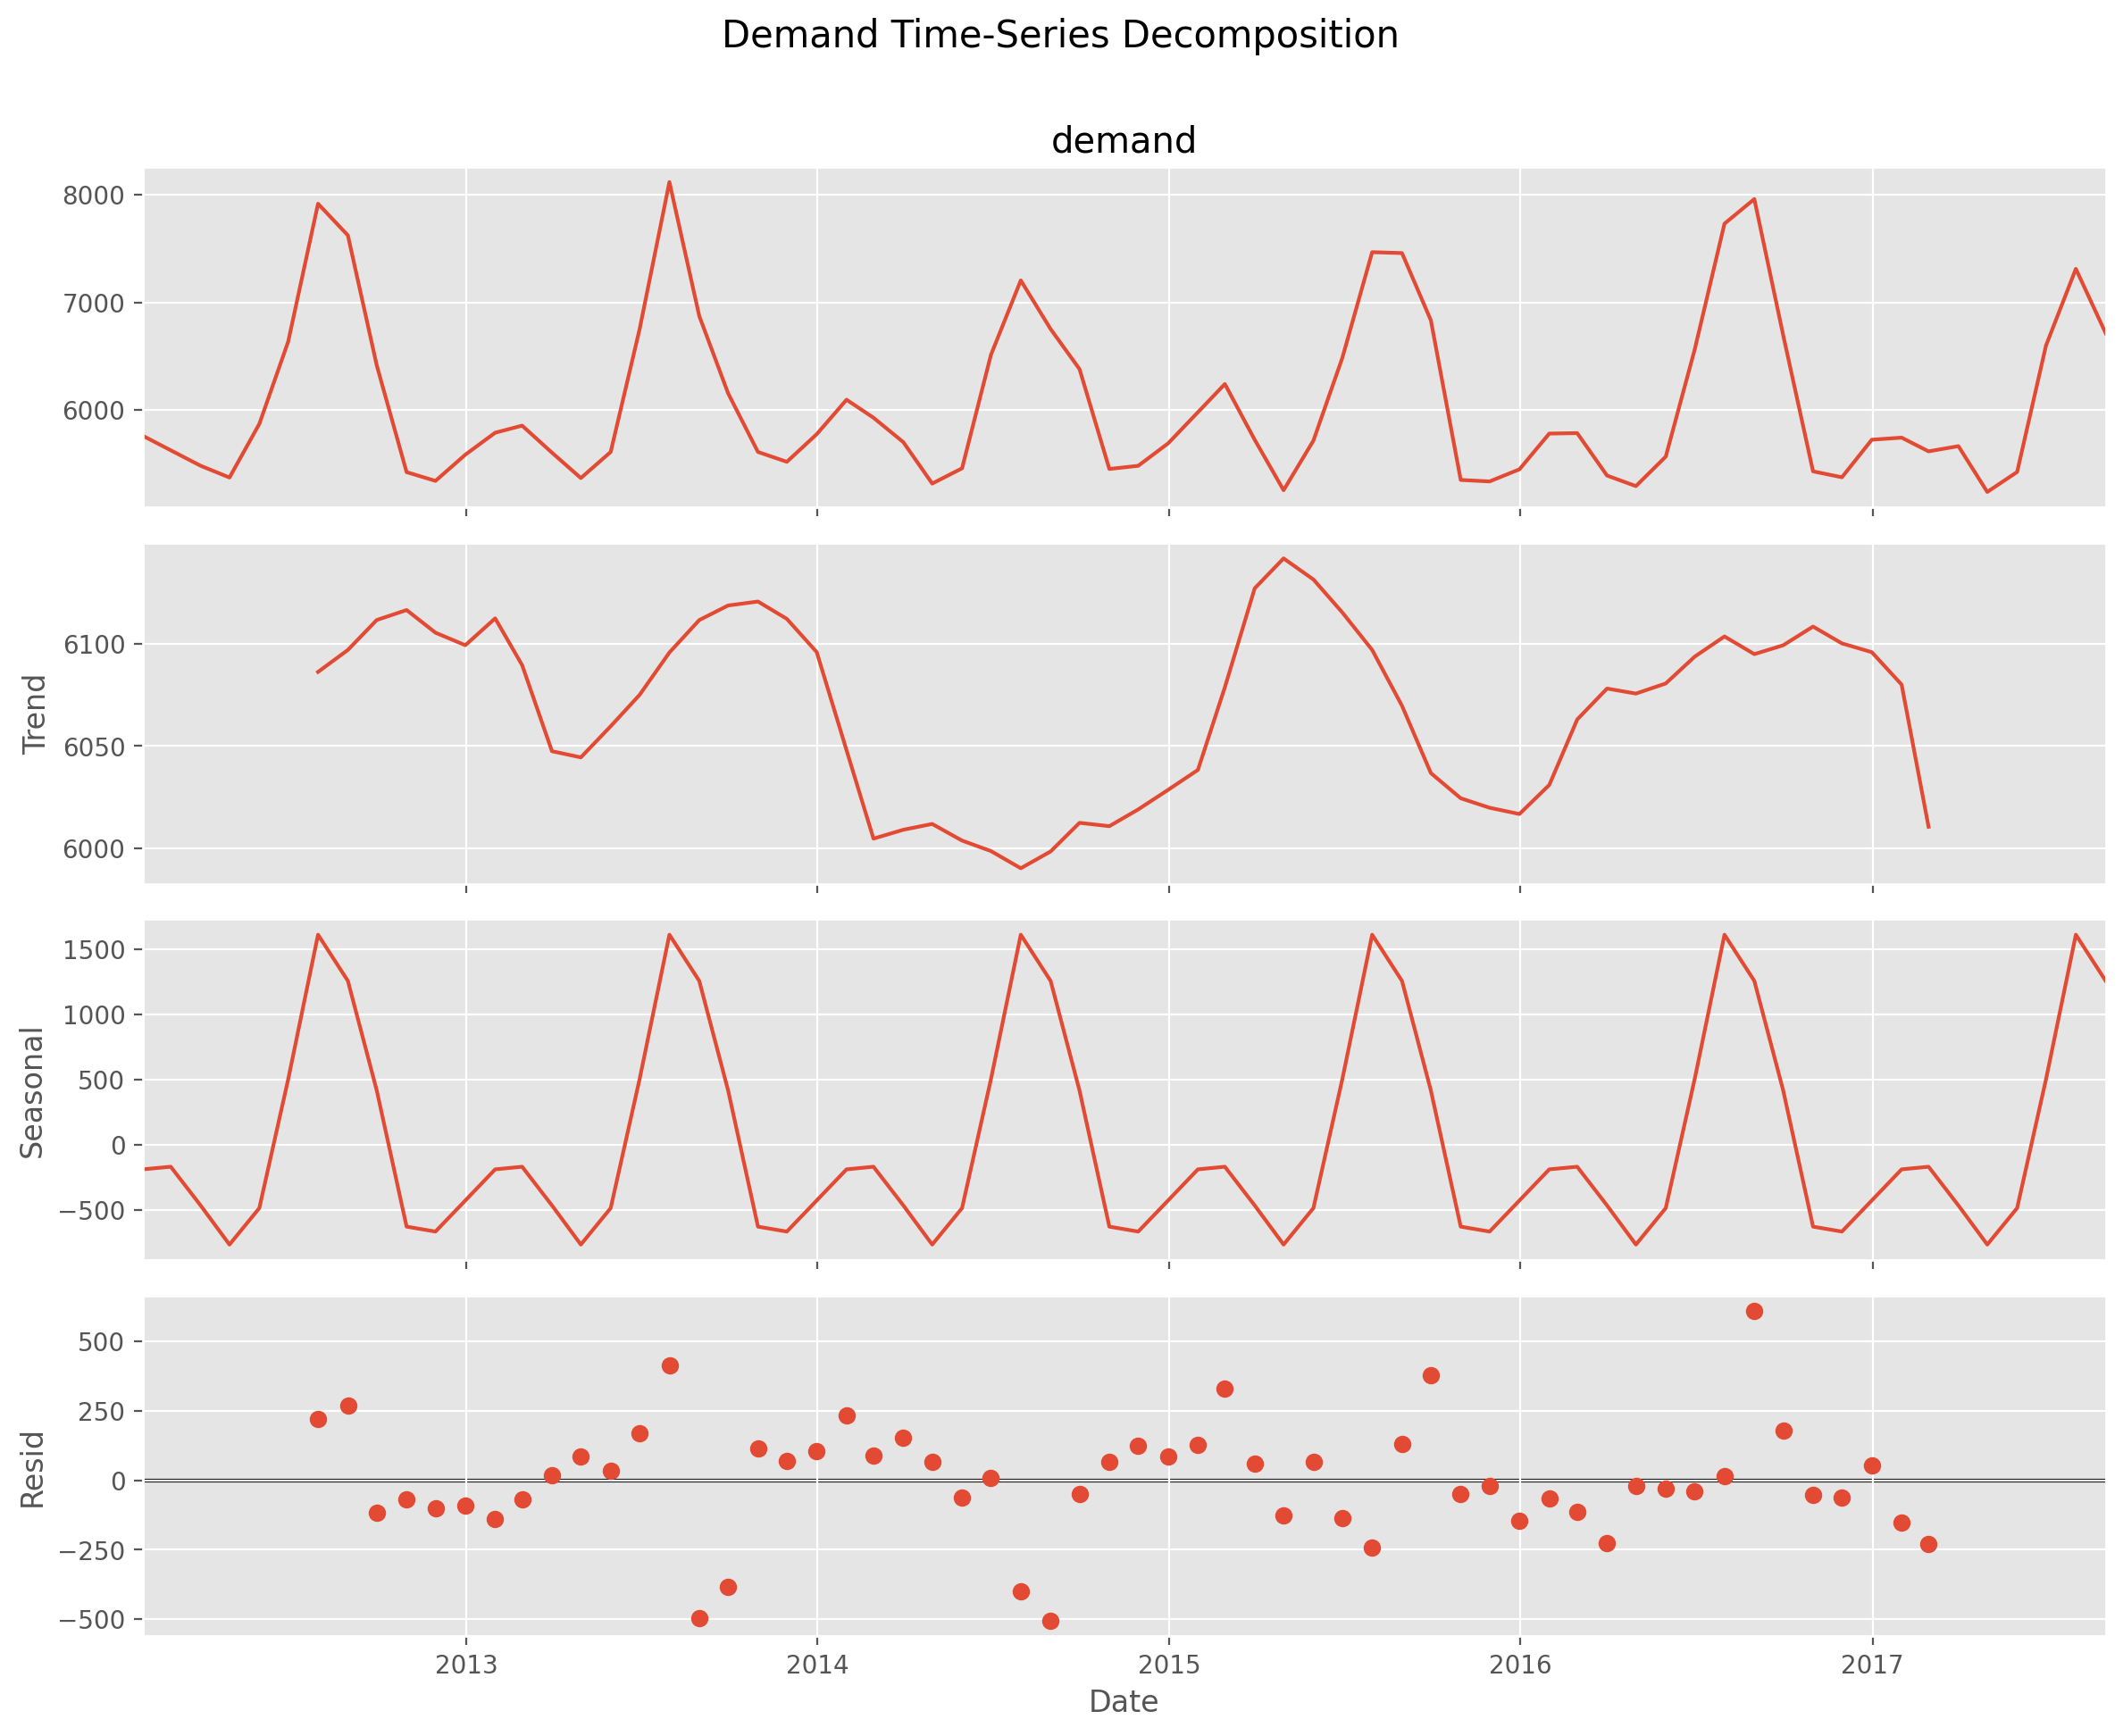

In [131]:
# Plot settings
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 12, 9  # Figure size (width,height)

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(final_df['demand'])

# Plot decomposition
fig = decomposition.plot()

# Specify axis labels
plt.xlabel("Date", fontsize=12)  # Text and size of xlabel
plt.suptitle(
    "Demand Time-Series Decomposition",  # Text of title
    y=1.05,  # Position of title
    size=15,  # Size of title
)
plt.show()

87.90191517489447


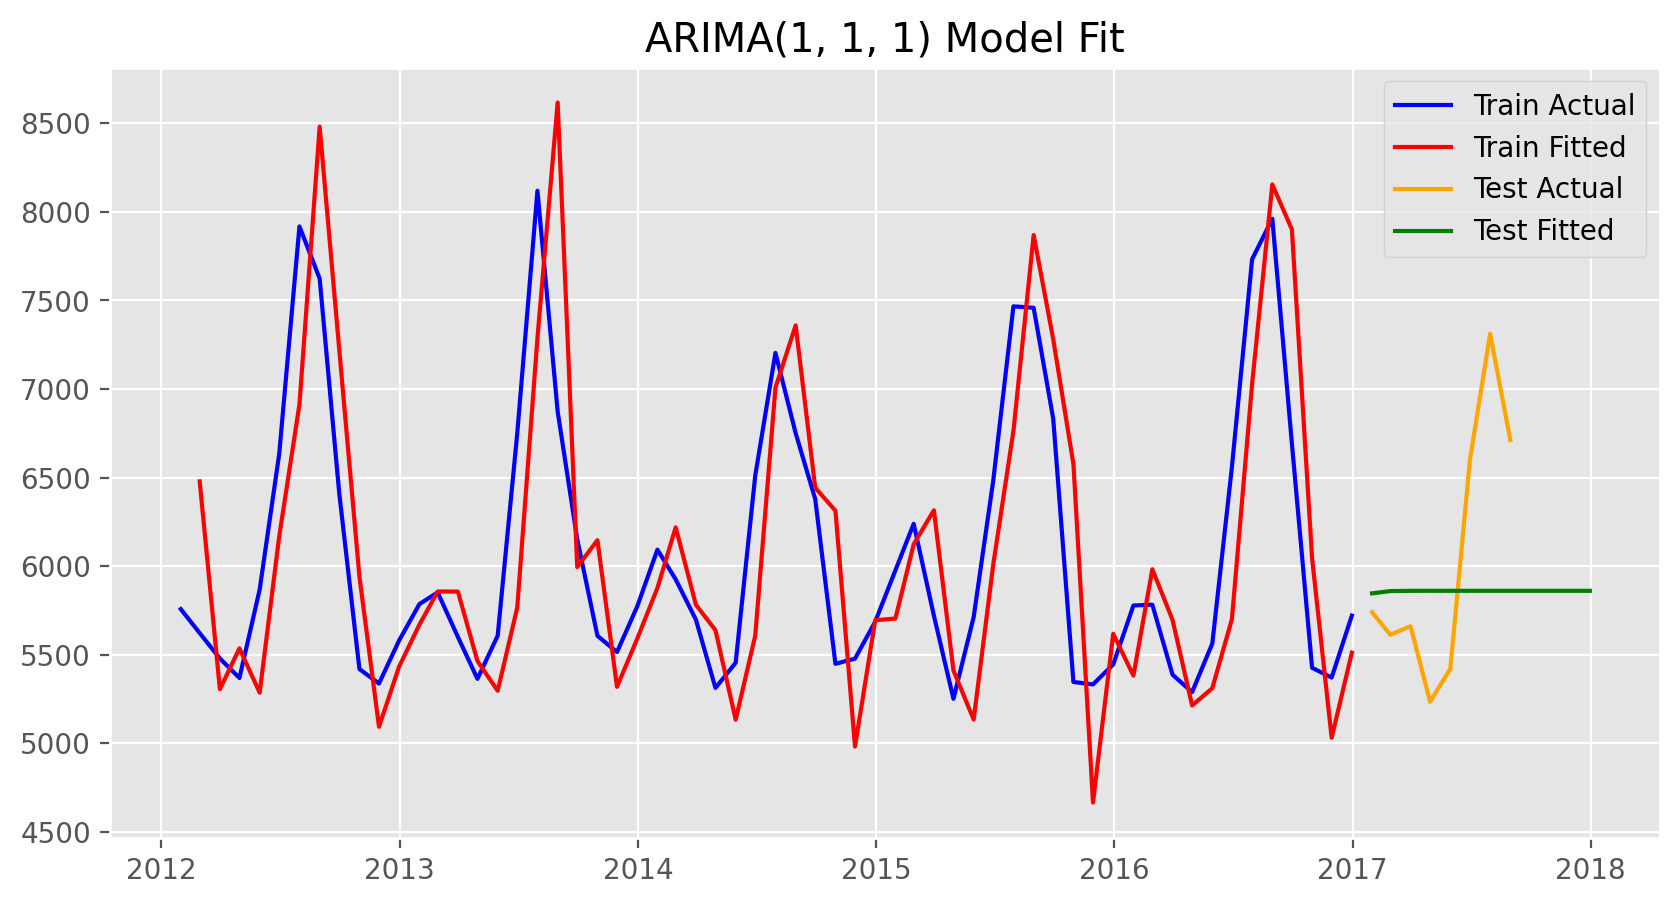

In [207]:
model = ARIMA(train['demand'], order=(1, 1, 1))
train_pred = model.fit()
test_pred = train_pred.forecast(steps=12)

print(train_pred.resid.mean())

plt.figure(figsize=(10, 5))
plt.plot(train['demand'], label="Train Actual", color='blue')
plt.plot(train.index[1:], train_pred.fittedvalues[1:], label="Train Fitted", color='red')
plt.plot(test['demand'], label="Test Actual", color='orange')
plt.plot(test_pred, label="Test Fitted", color='green')
plt.legend()
plt.title("ARIMA(1, 1, 1) Model Fit")
plt.show()

In [232]:
train.head()

demand    precip       temp  Close_Diff
timeStamp                                               
2012-01-31  5757.495833  0.003116  37.174288         NaN
2012-02-29  5622.331609  0.001650  40.448046 -135.164224
2012-03-31  5478.582661  0.001179  49.607917 -143.748948
2012-04-30  5368.945833  0.003959  54.255903 -109.636828
2012-05-31  5867.896102  0.005064  64.188078  498.950269

28.68146396536997


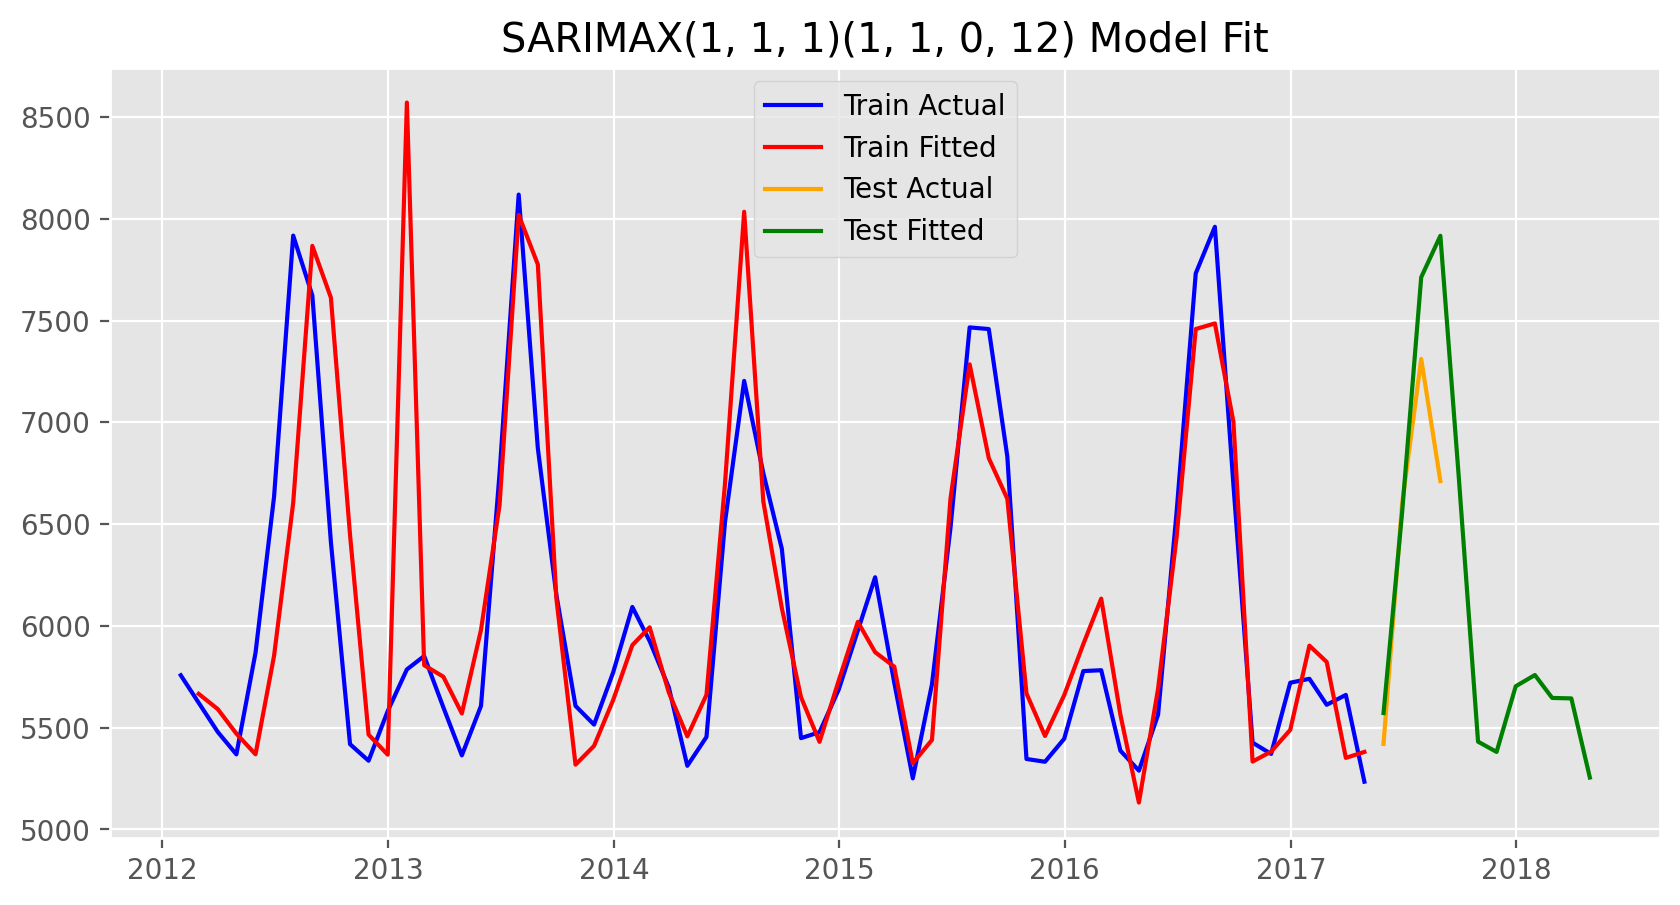

In [237]:
train=final_df[(final_df.index.get_level_values(0) >= '2012-01-31') & (final_df.index.get_level_values(0) <= '2017-04-30')]
test=final_df[(final_df.index.get_level_values(0) > '2017-04-30')]

model = SARIMAX(train["demand"], 
                order=(1, 1, 1),        # (p,d,q) -> Non-seasonal ARIMA part
                seasonal_order=(1, 1, 0, 12),  # (P,D,Q,s) -> Seasonal part
                trend=None)  

train_pred = model.fit()
test_pred = train_pred.forecast(steps=12)

print(train_pred.resid.mean())

plt.figure(figsize=(10, 5))
plt.plot(train['demand'], label="Train Actual", color='blue')
plt.plot(train.index[1:], train_pred.fittedvalues[1:], label="Train Fitted", color='red')
plt.plot(test['demand'], label="Test Actual", color='orange')
plt.plot(test_pred, label="Test Fitted", color='green')
plt.legend()
plt.title("SARIMAX(1, 1, 1)(1, 1, 0, 12) Model Fit")
plt.show()

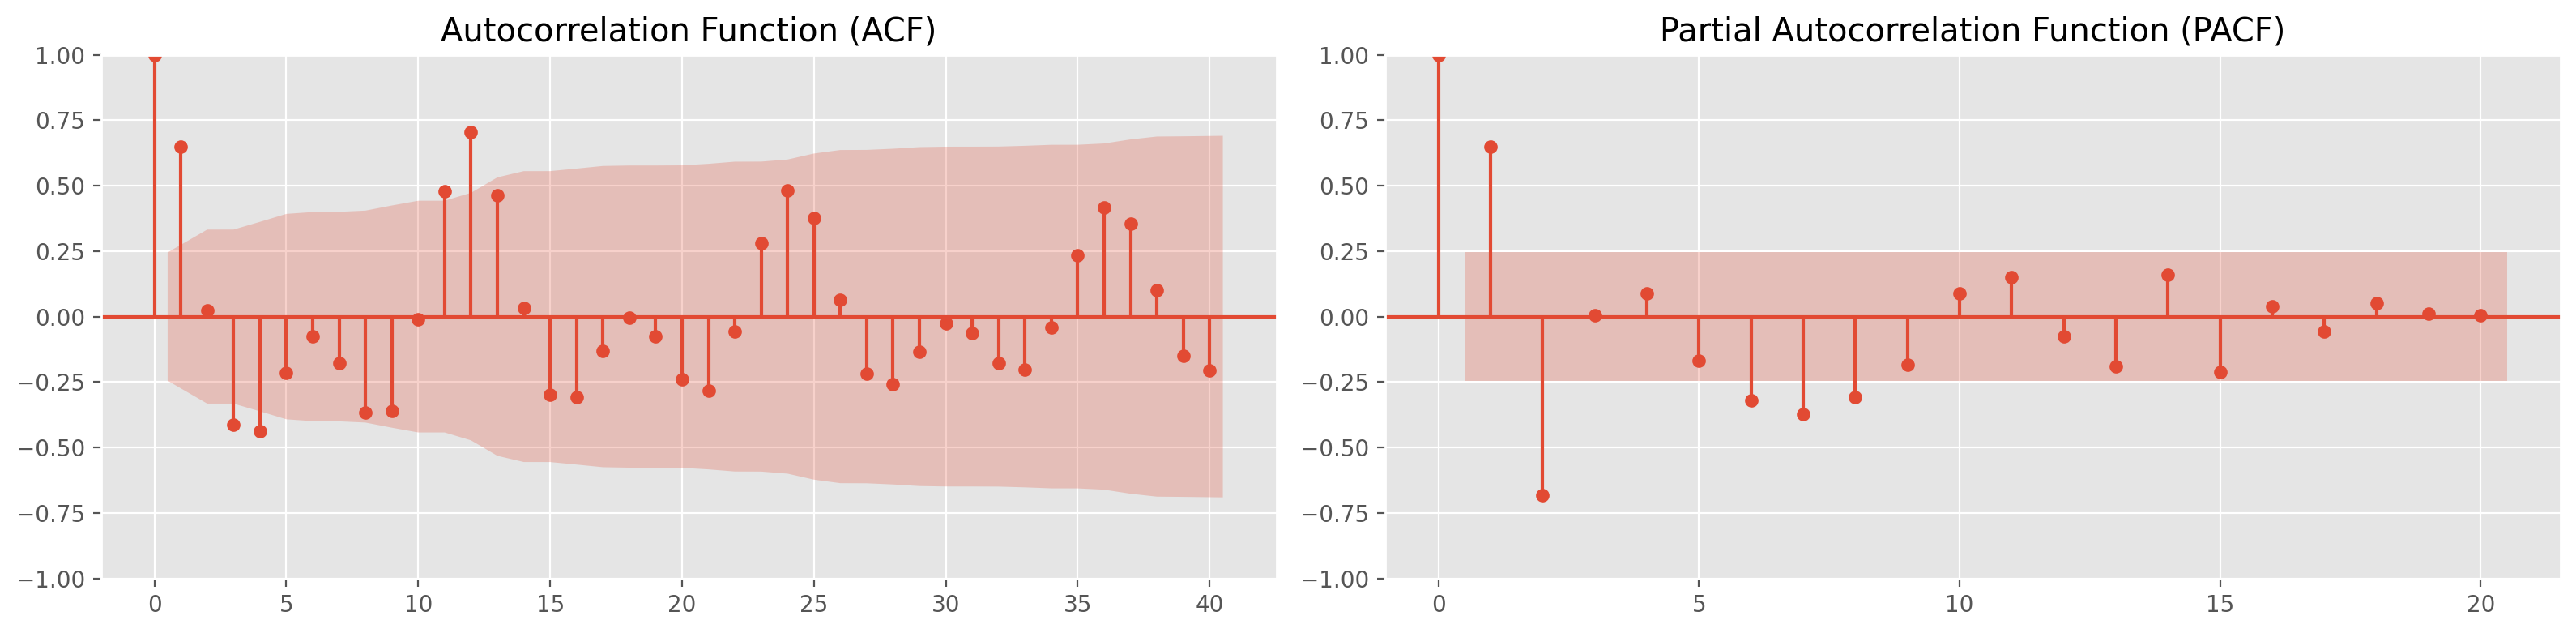

In [231]:
# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(train['demand'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(train['demand'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

38.75378763143506


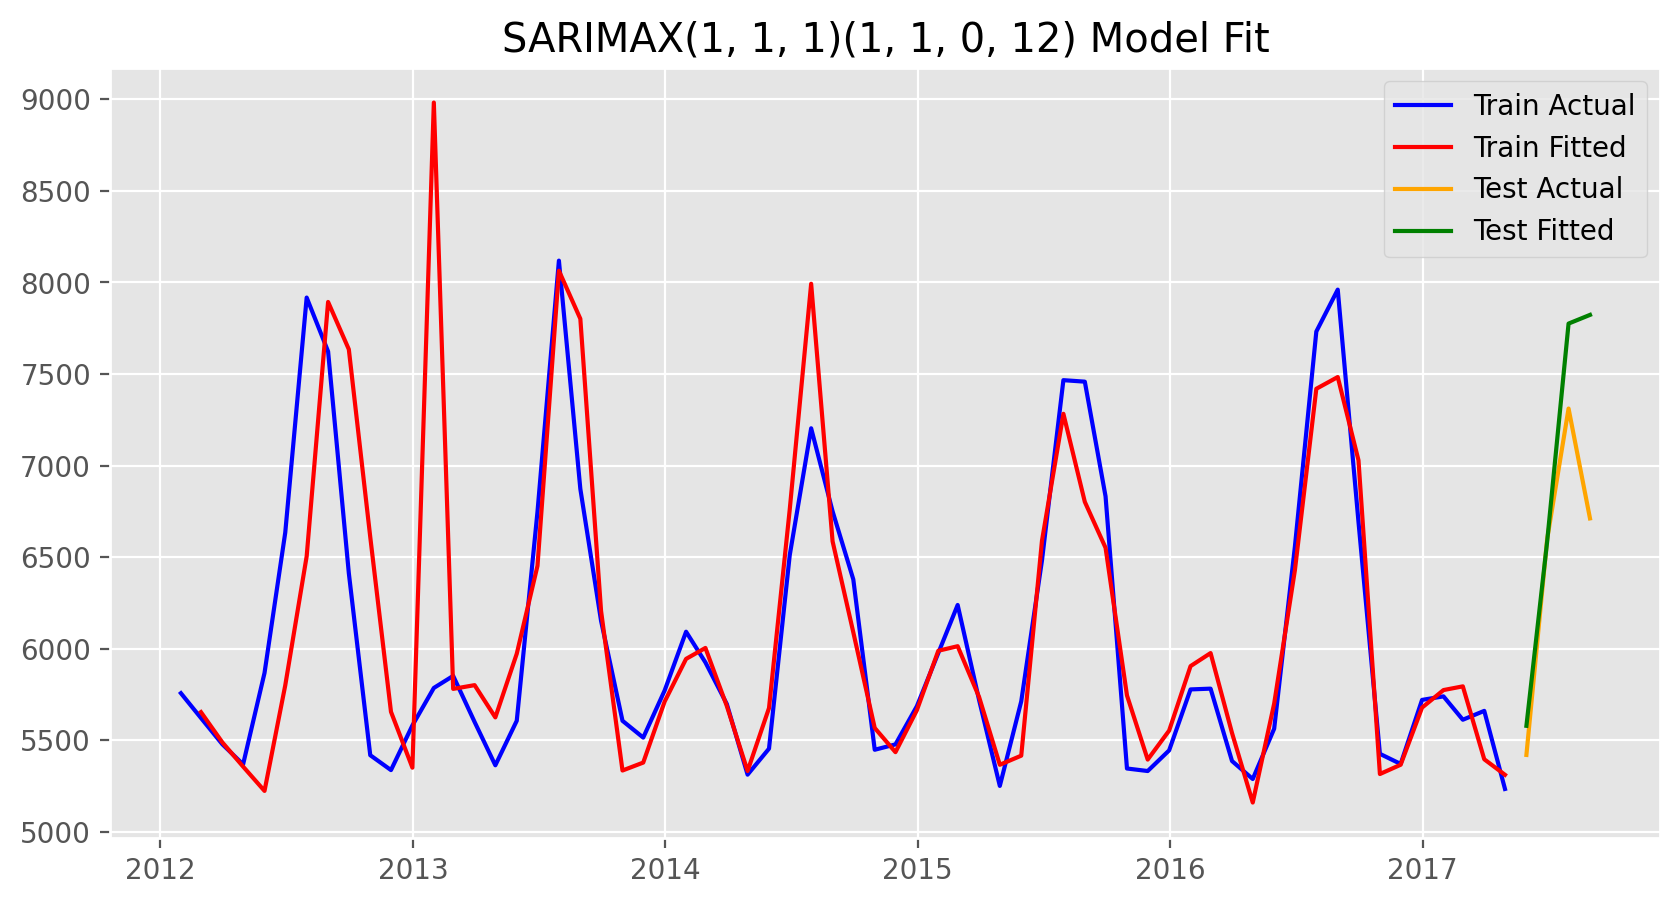

In [239]:
train=final_df[(final_df.index.get_level_values(0) >= '2012-01-31') & (final_df.index.get_level_values(0) <= '2017-04-30')]
test=final_df[(final_df.index.get_level_values(0) > '2017-04-30')]

exog_train = train[['temp', 'precip']] 
exog_test = test[['temp', 'precip']] 

model = SARIMAX(train["demand"],
                exog=exog_train,  
                order=(1, 1, 1),        # (p,d,q) -> Non-seasonal ARIMA part
                seasonal_order=(1, 1, 0, 12),  # (P,D,Q,s) -> Seasonal part
                trend=None)  

train_pred = model.fit()
test_pred = train_pred.forecast(steps=4, exog=exog_test)

print(train_pred.resid.mean())

plt.figure(figsize=(10, 5))
plt.plot(train['demand'], label="Train Actual", color='blue')
plt.plot(train.index[1:], train_pred.fittedvalues[1:], label="Train Fitted", color='red')
plt.plot(test['demand'], label="Test Actual", color='orange')
plt.plot(test_pred, label="Test Fitted", color='green')
plt.legend()
plt.title("SARIMAX(1, 1, 1)(1, 1, 0, 12) Model Fit")
plt.show()